In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Attribute Information:

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps

In [53]:
df=pd.read_csv("trainKNN.txt",names=["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"])
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [54]:
df2=pd.read_csv("testKNN.txt",names=["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"])
df2.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [55]:
df.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [56]:
df2.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [57]:
df.drop(columns="Id",inplace=True)
df2.drop(columns="Id",inplace=True)

In [58]:
df.shape,df2.shape

((196, 10), (18, 10))

In [59]:
df.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

In [60]:
df.shape,df2.shape

((195, 10), (18, 10))

In [61]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

### Scaling

In [97]:
X_train=df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].values
y_train=df["Type of glass"].values
X_test=df2[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].values
y_test=df2["Type of glass"].values

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### K-NN model Using Euclidean distance(default)

In [98]:
for i in np.arange(1,30):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train) 
    print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " cv score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

K value  :  1  train score :  1.0  cv score :  0.6921052631578949
K value  :  2  train score :  0.841025641025641  cv score :  0.7286842105263156
K value  :  3  train score :  0.8512820512820513  cv score :  0.6818421052631579
K value  :  4  train score :  0.7948717948717948  cv score :  0.6923684210526316
K value  :  5  train score :  0.8  cv score :  0.6821052631578948
K value  :  6  train score :  0.7794871794871795  cv score :  0.6821052631578948
K value  :  7  train score :  0.7333333333333333  cv score :  0.6563157894736842
K value  :  8  train score :  0.7487179487179487  cv score :  0.6613157894736842
K value  :  9  train score :  0.7282051282051282  cv score :  0.6507894736842106
K value  :  10  train score :  0.7128205128205128  cv score :  0.6507894736842106
K value  :  11  train score :  0.7282051282051282  cv score :  0.635
K value  :  12  train score :  0.7128205128205128  cv score :  0.6455263157894737
K value  :  13  train score :  0.7076923076923077  cv score :  0.6452

In [112]:
knn = KNeighborsClassifier(5)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.5555555555555556

In [80]:
y_pred = knn.predict(X_test_scaled)
y_pred

array([1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 6, 2, 7, 7, 7, 7], dtype=int64)

### confusion matrix

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3, 0, 0, 0, 0, 0],
       [1, 2, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 3]], dtype=int64)

In [82]:
#dir(knn)

##### accuracy score

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
#from sklearn.metrics import roc_auc_score
#roc_auc_score(y_test,y_pred)


0.5

###### training data visualization

In [86]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


(-2.2889720674548686, 5.144381555810574)

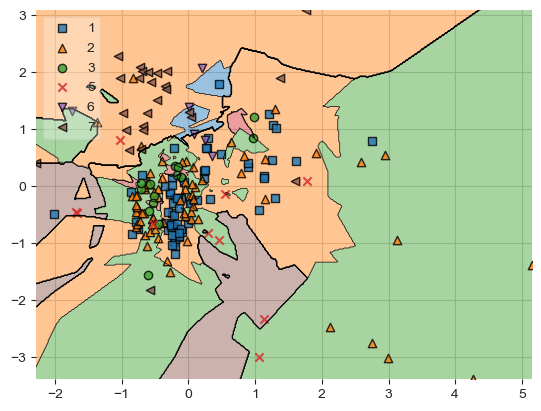

In [87]:
from mlxtend.plotting import plot_decision_regions
X_train=df.iloc[:,0:2]
y_train=df.iloc[:,9]

X_test=df.iloc[:,0:2]
y_test=df.iloc[:,9]

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

knn = KNeighborsClassifier(4)
knn.fit(X_train_scaled,y_train)

ax=plot_decision_regions(X_train_scaled, y_train.values, clf=knn, legend= 2)
ax.set_ylim(X_train_scaled[:,1].min(), X_train_scaled[:,1].max())
ax.set_xlim(X_train_scaled[:,0].min(), X_train_scaled[:,0].max())

###### test data visualization

(-2.2889720674548686, 5.144381555810574)

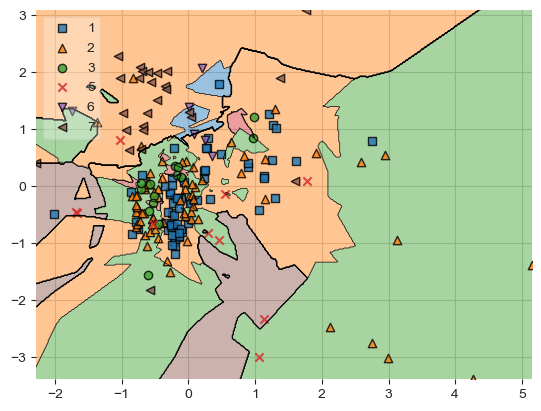

In [88]:
ax=plot_decision_regions(X_test_scaled, y_test.values, clf=knn, legend= 2)
ax.set_ylim(X_test_scaled[:,1].min(), X_train_scaled[:,1].max())
ax.set_xlim(X_train_scaled[:,0].min(), X_train_scaled[:,0].max())

### K-NN model Using ManhattanDistance

In [89]:
for i in np.arange(1,20):
    knn = KNeighborsClassifier(i,metric="manhattan")
    knn.fit(X_train_scaled,y_train) 
    print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " cv score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

K value  :  1  train score :  1.0  cv score :  0.5655263157894737
K value  :  2  train score :  0.7948717948717948  cv score :  0.5576315789473684
K value  :  3  train score :  0.7846153846153846  cv score :  0.5678947368421052
K value  :  4  train score :  0.7384615384615385  cv score :  0.5836842105263158
K value  :  5  train score :  0.676923076923077  cv score :  0.5786842105263158
K value  :  6  train score :  0.6974358974358974  cv score :  0.5986842105263157
K value  :  7  train score :  0.6871794871794872  cv score :  0.6194736842105263
K value  :  8  train score :  0.6666666666666666  cv score :  0.5886842105263158
K value  :  9  train score :  0.6717948717948717  cv score :  0.5831578947368421
K value  :  10  train score :  0.6666666666666666  cv score :  0.5834210526315788
K value  :  11  train score :  0.6512820512820513  cv score :  0.5989473684210527
K value  :  12  train score :  0.6461538461538462  cv score :  0.5886842105263157
K value  :  13  train score :  0.65641025

In [90]:
knn = KNeighborsClassifier(7,metric="manhattan")
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.6871794871794872

In [91]:
y_pred = knn.predict(X_test_scaled)
y_pred

array([1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 7,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       7, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 1, 3, 3, 7,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 7, 1, 7, 7, 5, 6, 1, 1, 1, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7],
      dtype=int64)

##### confusion matrix

In [92]:
confusion_matrix(y_test,y_pred)

array([[54, 11,  0,  0,  0,  1],
       [12, 57,  1,  0,  0,  3],
       [ 2,  9,  3,  0,  0,  0],
       [ 3,  6,  0,  0,  0,  1],
       [ 3,  0,  0,  0,  0,  3],
       [ 3,  1,  0,  1,  1, 20]], dtype=int64)

##### accuracy score

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6871794871794872

##### training data visualization

(-2.2889720674548686, 5.144381555810574)

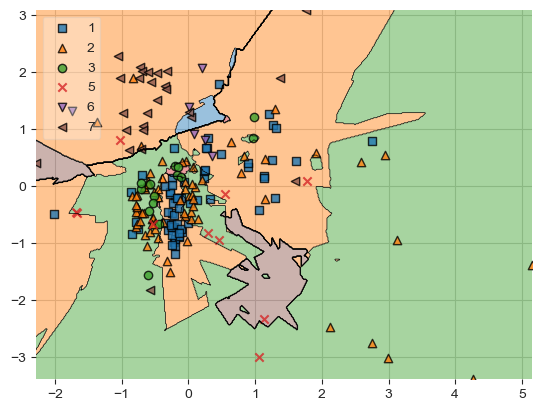

In [94]:
from mlxtend.plotting import plot_decision_regions
X_train=df.iloc[:,0:2]
y_train=df.iloc[:,9]

X_test=df.iloc[:,0:2]
y_test=df.iloc[:,9]

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

knn = KNeighborsClassifier(7)
knn.fit(X_train_scaled,y_train)

ax=plot_decision_regions(X_train_scaled, y_train.values, clf=knn, legend= 2)
ax.set_ylim(X_train_scaled[:,1].min(), X_train_scaled[:,1].max())
ax.set_xlim(X_train_scaled[:,0].min(), X_train_scaled[:,0].max())

###### test data visualization

(-2.2889720674548686, 5.144381555810574)

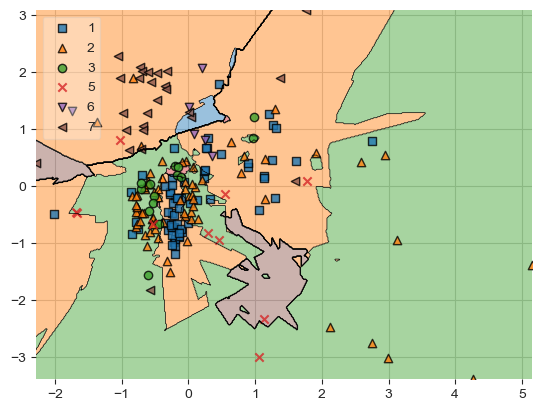

In [96]:
ax=plot_decision_regions(X_test_scaled, y_test.values, clf=knn, legend= 2)
ax.set_ylim(X_test_scaled[:,1].min(), X_train_scaled[:,1].max())
ax.set_xlim(X_test_scaled[:,0].min(), X_test_scaled[:,0].max())

#### Conclusion:
    K-NN using manhattan distance performing better.